# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

C:\Users\Sean Xander Aquino\AppData\Local\Temp\ipykernel_21964\2265870996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
online_retail = fetch_ucirepo(id=352)

In [3]:
X = online_retail.data.features

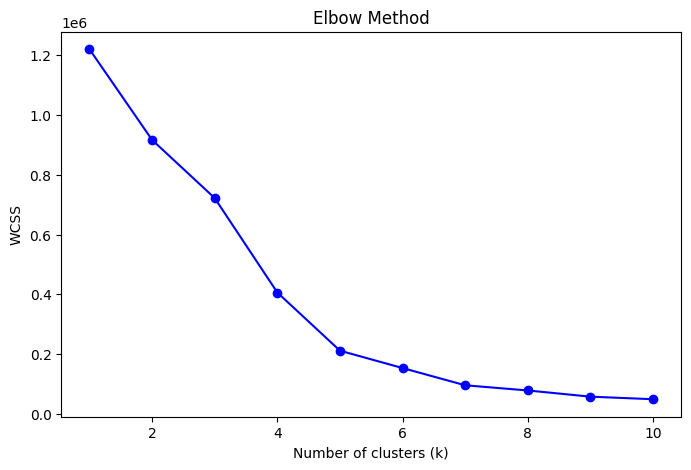

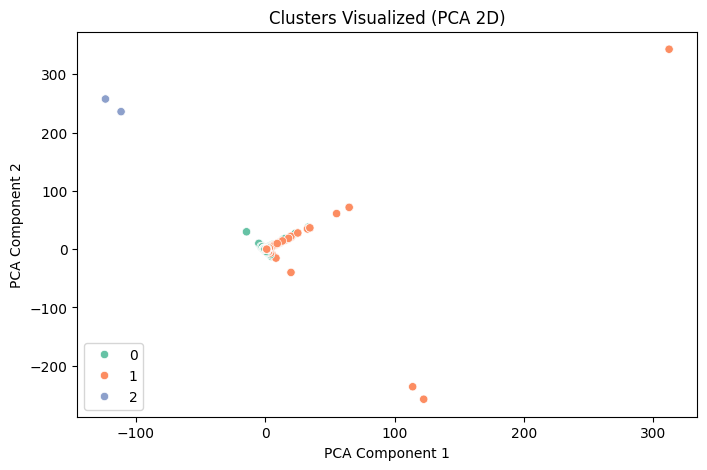

In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# 2. Load Dataset
online_retail = fetch_ucirepo(id=352)

# 3. Extract Features
X = online_retail.data.features

# 4. Data Cleaning
# We'll select only numerical columns for clustering
X_numeric = X.select_dtypes(include=[np.number])

# Optional: Drop rows with missing values
X_numeric = X_numeric.dropna()

# 5. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# 6. Find Optimal K using the Elbow Method
wcss = []  # within-cluster sum of squares
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# 7. Apply KMeans with optimal K (e.g., assume k=3 for now)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to the original data
X_numeric['Cluster'] = clusters

# 8. Visualize Clusters (for the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Clusters Visualized (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load dataset
dataset = fetch_ucirepo(id=352)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

# Step 2: Clean and filter

print(df.columns)


Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country'],
      dtype='object')


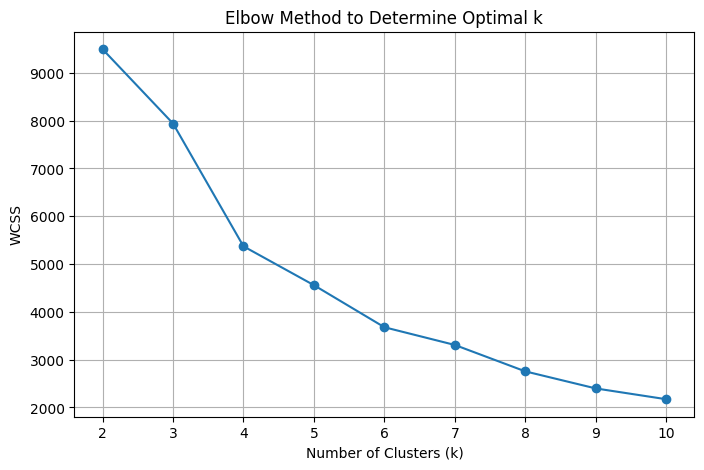

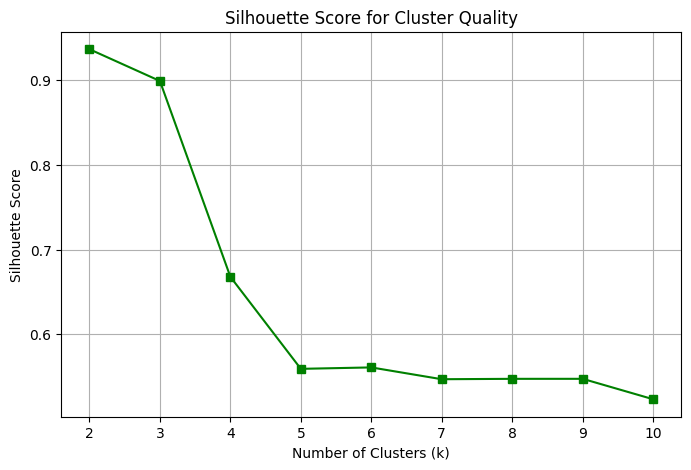

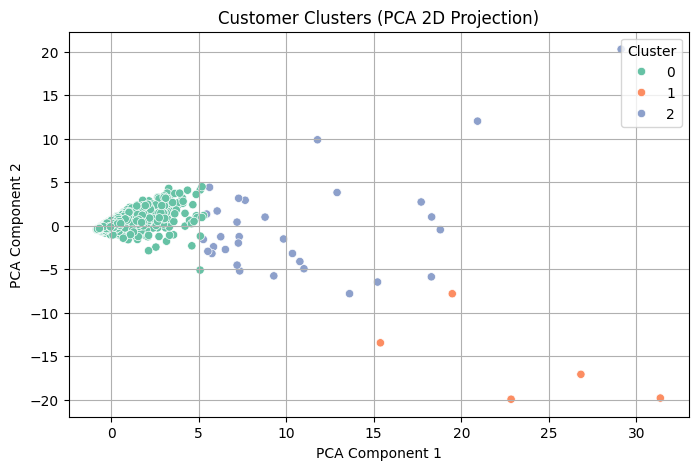


📊 Cluster Summary:
         TotalQuantity  TotalSpent  ProductVariety  PurchaseFrequency
Cluster                                                              
0               804.23     1364.81           58.60               3.82
1             70775.60   158185.31          151.20              27.20
2             24375.69    38060.00          345.78              50.22


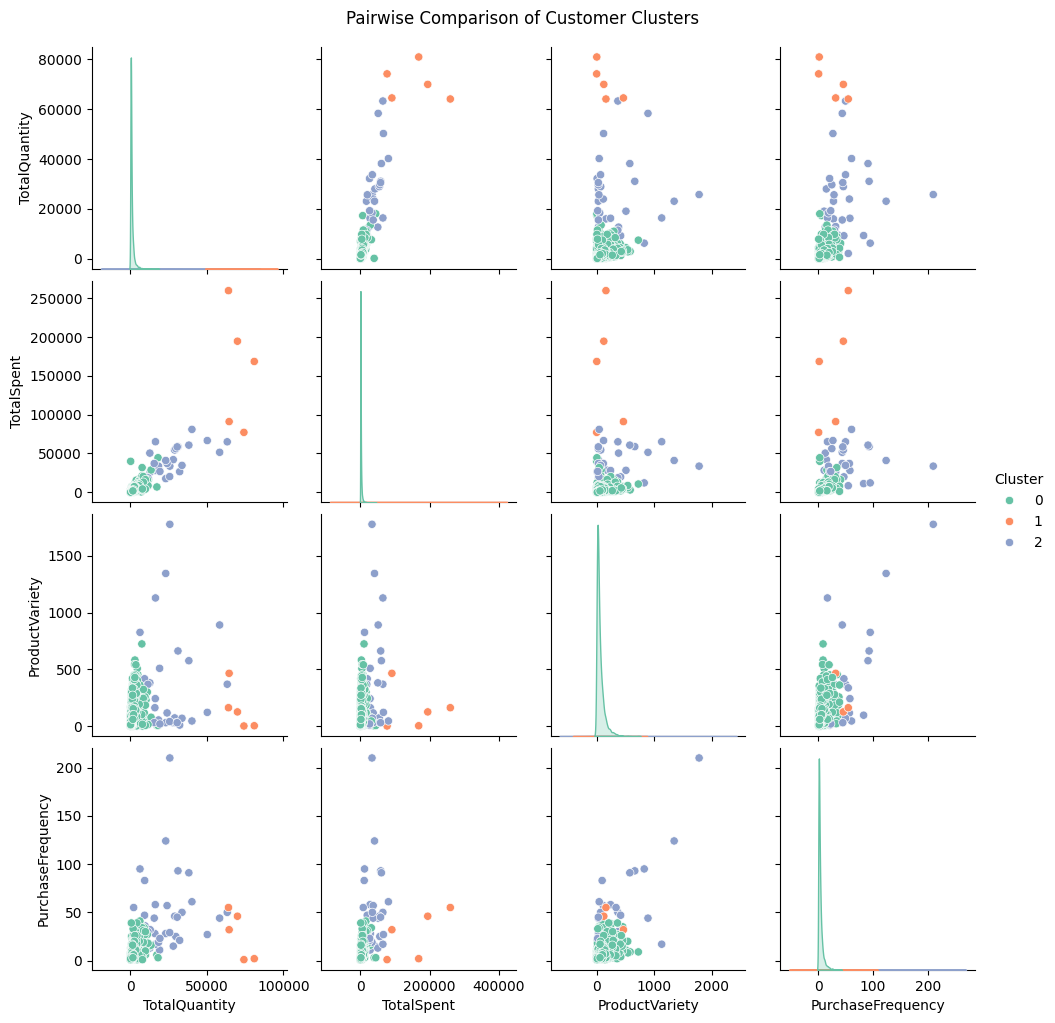

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load dataset
dataset = fetch_ucirepo(id=352)
df = dataset.data.original.copy()  # Use original to preserve all columns

# Step 2: Clean and filter
df = df.dropna(subset=["CustomerID"])               # Remove rows with missing customer IDs
df = df[df["Quantity"] > 0]                          # Keep only valid purchase quantities
df = df[df["UnitPrice"] > 0]                         # Remove free or negative-priced entries
df = df[df["Country"] == "United Kingdom"]           # Focus on UK customers

# Step 3: Add computed column
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Step 4: Aggregate customer-level data
customer_df = df.groupby("CustomerID").agg({
    "Quantity": "sum",               # Total items bought
    "TotalPrice": "sum",            # Total money spent
    "Description": "nunique",       # Unique item types bought
    "InvoiceDate": "nunique"        # Purchase frequency (by invoice dates)
}).rename(columns={
    "Quantity": "TotalQuantity",
    "TotalPrice": "TotalSpent",
    "Description": "ProductVariety",
    "InvoiceDate": "PurchaseFrequency"
}).reset_index()

# Step 5: Standardize the features
features = ["TotalQuantity", "TotalSpent", "ProductVariety", "PurchaseFrequency"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df[features])

# Step 6: Elbow Method
wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 7: Silhouette Score
sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, sil_scores, marker='s', color='green')
plt.title('Silhouette Score for Cluster Quality')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Step 8: Final Clustering (use k=3 as a common choice or best from above)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 9: PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=customer_df["Cluster"], palette="Set2")
plt.title("Customer Clusters (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Step 10: Cluster profiles
print("\n📊 Cluster Summary:")
print(customer_df.groupby("Cluster")[features].mean().round(2))

# Step 11: Optional: Pairplot
sns.pairplot(customer_df, hue="Cluster", vars=features, palette="Set2")
plt.suptitle("Pairwise Comparison of Customer Clusters", y=1.02)
plt.show()


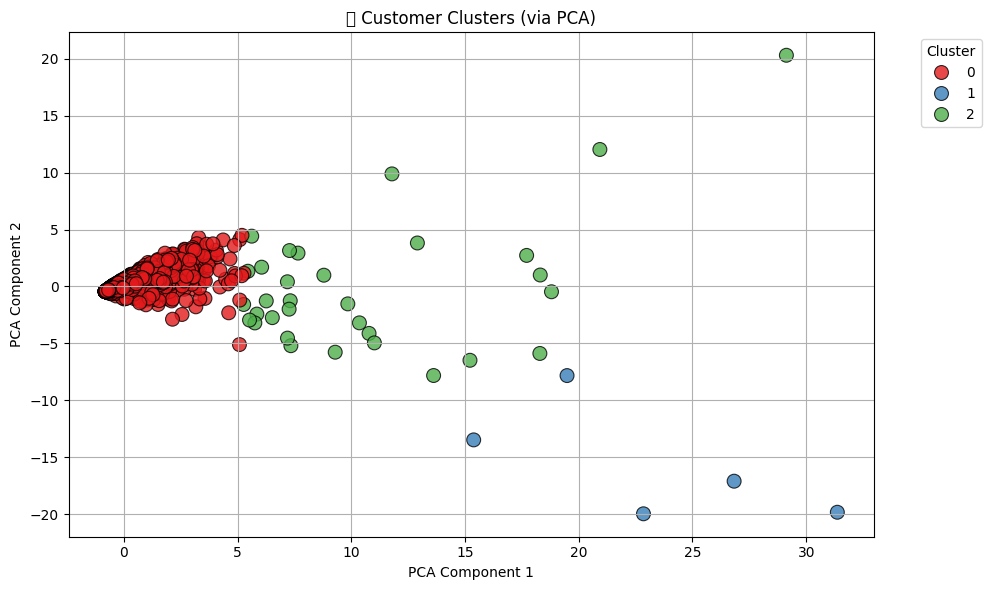

In [6]:
# Scatterplot of PCA components with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=customer_df["Cluster"],
    palette="Set1",
    s=100,
    alpha=0.8,
    edgecolor='k'
)
plt.title("📊 Customer Clusters (via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


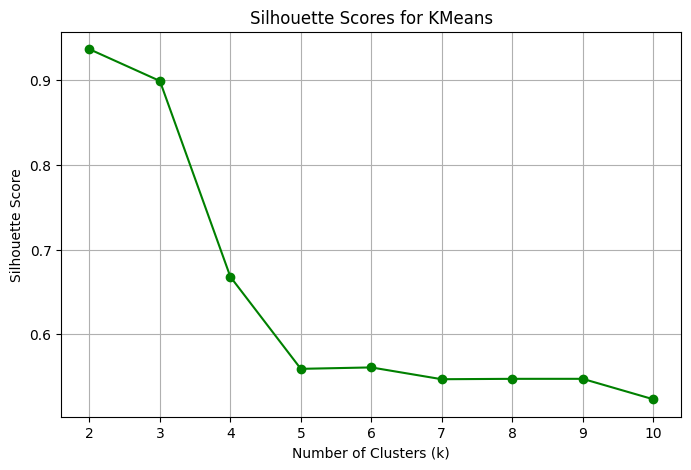

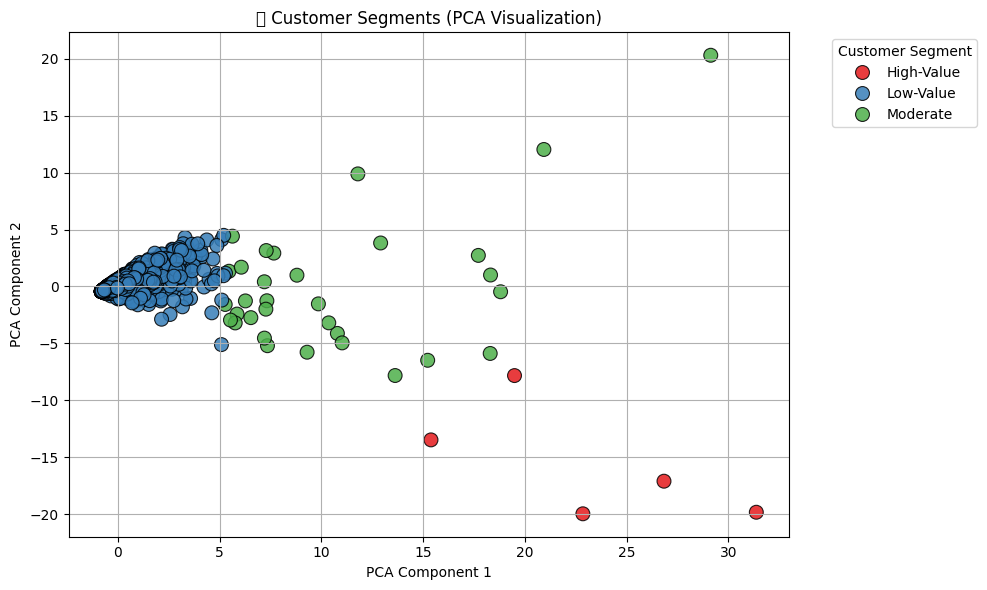

📊 Cluster Summary:

              TotalQuantity  TotalSpent  ProductVariety  PurchaseFrequency
ClusterLabel                                                              
High-Value         70775.60   158185.31          151.20              27.20
Low-Value            804.23     1364.81           58.60               3.82
Moderate           24375.69    38060.00          345.78              50.22


In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load dataset
dataset = fetch_ucirepo(id=352)
df = dataset.data.original.copy()

# Step 2: Clean and filter
df = df.dropna(subset=["CustomerID"])
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]
df = df[df["Country"] == "United Kingdom"]

# Step 3: Add computed column
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Step 4: Aggregate to customer level
customer_df = df.groupby("CustomerID").agg({
    "Quantity": "sum",
    "TotalPrice": "sum",
    "Description": "nunique",
    "InvoiceDate": "nunique"
}).rename(columns={
    "Quantity": "TotalQuantity",
    "TotalPrice": "TotalSpent",
    "Description": "ProductVariety",
    "InvoiceDate": "PurchaseFrequency"
}).reset_index()

# Step 5: Standardize features
features = ["TotalQuantity", "TotalSpent", "ProductVariety", "PurchaseFrequency"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df[features])

# Step 6: Determine optimal k using silhouette score
sil_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, sil_scores, marker='o', color='green')
plt.title("Silhouette Scores for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 7: Final Clustering (choose optimal k, e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 8: Label clusters by behavior (based on TotalSpent)
cluster_summary = customer_df.groupby("Cluster")[features].mean().sort_values("TotalSpent", ascending=False)
cluster_ranks = cluster_summary.reset_index().copy()
cluster_ranks["ClusterLabel"] = ["High-Value", "Moderate", "Low-Value"][:optimal_k]

# Map labels back to main DataFrame
label_map = dict(zip(cluster_ranks["Cluster"], cluster_ranks["ClusterLabel"]))
customer_df["ClusterLabel"] = customer_df["Cluster"].map(label_map)

# Step 9: PCA for scatterplot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 10: Scatterplot with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=customer_df["ClusterLabel"],
    palette="Set1",
    s=100,
    alpha=0.85,
    edgecolor="k"
)
plt.title("📌 Customer Segments (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Customer Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# Step 11: Show summary for interpretation
print("📊 Cluster Summary:\n")
print(customer_df.groupby("ClusterLabel")[features].mean().round(2))
